## Resumen del Tutorial

Clustering consiste en automáticamente descubrir grupos en datos. Los algoritmos de clustering únicamente interpretan el input data y van a encontrar grupos naturales o clusters en feature spaces.

En el tutorial se explicaron 10 algoritmos:

- **Affinity Propagation:** Se basa en el concepto de pasar mensajes entre data points. Este intercambio se da hasta que se llega a un modelo de buena calidad y los correspondientes clusters empiezan a emerger.
- **Agglomerative Clustering:** Consiste en mergear datos hasta que eventualmente el número deseado de clusters es alcanzado.
- **BIRCH:** Consiste en construir un árbol donde los centroides son extraídos. Básicamente es un clustering jerárquico.
- **DBSCAN:** Consiste en encontrar áreas de alta densidad en el dominio y expandir (o agrupar creo que es mejor el término) dichas áreas como clusters.
- **K-Means:** Uno de los más conocidos, consiste en asignar los datos (no sé qué palabra usar en español, el tutorial usa examples) a k clusters, donde cada uno de esos datos va a pertenecer al cluster con la media más cercana.
- **Mini-Batch K-Means:** Es una versión modificada de K-Means. Su objetivo es mejorar el rendimiento especialmente para grandes datasets.
- **Mean Shift:** Consiste en encontrar y adaptar centroides basados en los datos (examples) en el dominio.
- **OPTICS:** Es una versión modificada de DBSCAN. El algoritmo encuentra clusters basados en densidad. Una ventaja que tiene sobre DBSCAN es que puede detectar clusters significativos en datos con densidad variada.
- **Spectral Clustering:** Bastado en álgebra lineal. Consiste en un usar spectral methods en clustering para reducir la dimensionalidad.
- **Gaussian Mixture Model:** De todos los ejemplos, fue el que tuvo mejor resultado. Consiste en una combinación de múltiples distribuciones Gausianas.

## Ejercicio

Profesor, honestamente esta práctica sí tuve averiguar un poco más por mi propia cuenta, porque no tenía tan claro cómo manejar datos reales en lugar de sintéticos. Entonces tuve que buscar varios tutoriales para poder entender cómo manejar esos datos, y, por otro lado, visualizar los resultados. Sí quisiera adelantar desde ya que me cuesta un poco interpretar los datos (incluso en el tutorial que mandó), entonces no pude interpretar los resultados.

Tutoriales con los que me basé:
- https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python
- https://www.geeksforgeeks.org/ml-optics-clustering-implementing-using-sklearn/
- https://www.reneshbedre.com/blog/dbscan-python.html
- https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d

### Imports

In [1]:
import numpy as np
from sklearn.cluster import OPTICS, DBSCAN, cluster_optics_dbscan
from matplotlib import gridspec
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
import pandas as pd

### Cargar datos

In [2]:
X = pd.read_csv('wine-clustering.csv')  
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Normalizar datos

In [3]:
# Normalizar datos para que sigan una distribucion Gaussiana
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
X_normalized.columns = X.columns
X_normalized.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


### Modelos

In [4]:
# Entrenar modelo
model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)
model.fit(X_normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

### Labels

In [5]:
# DBSCAN eps = 0.5
dbscan1_labels = cluster_optics_dbscan(reachability = model.reachability_,
                                   core_distances = model.core_distances_,
                                   ordering = model.ordering_, eps = 0.5)

# DBSCAN eps = 2.0
dbscan2_labels = cluster_optics_dbscan(reachability = model.reachability_,
                                   core_distances = model.core_distances_,
                                   ordering = model.ordering_, eps = 2)
  
# OPTICS
labels = model.labels_[model.ordering_]
  
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


### Visualizar

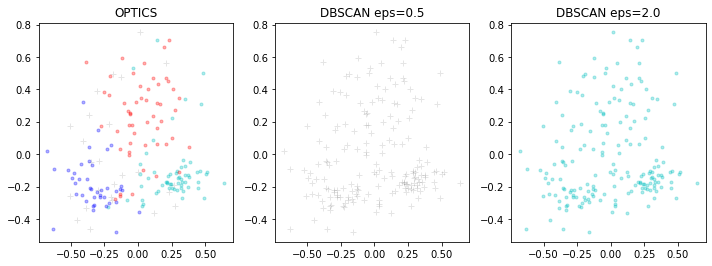

In [6]:
# Framework
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[1, 0])
ax2 = plt.subplot(G[1, 1])
ax3 = plt.subplot(G[1, 2])
    
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = X_normalized[model.labels_ == Class]
    ax1.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax1.plot(X_normalized.iloc[model.labels_ == -1, 0],
        X_normalized.iloc[model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax1.set_title('OPTICS')
  
# DBSCAN eps = 0.5 Plotting
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = X_normalized[dbscan1_labels == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
        
ax2.plot(X_normalized.iloc[dbscan1_labels == -1, 0],
        X_normalized.iloc[dbscan1_labels == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('DBSCAN eps=0.5')
  
# DBSCAN eps = 2.0 Plotting
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = X_normalized.iloc[dbscan2_labels == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
          
ax3.plot(X_normalized.iloc[dbscan2_labels == -1, 0],
        X_normalized.iloc[dbscan2_labels == -1, 1],
       'k+', alpha = 0.1)
ax3.set_title('DBSCAN eps=2.0')
  
  
plt.tight_layout()
plt.show()

## Resultados